In [1]:
import numpy as np
import sys
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
DEF_PATH = "['r1', 'r2', 'r3']"
LOSSES =[5, 10, 15] # %

# parses the prediction files and group it
def path_analysis(filename='retest'):
    stats = {}
    for pred in os.listdir('./'):
        if filename in pred:
            stats[pred]=[]
            with open(pred, 'r') as f:
                lines = f.readlines()
            for i in range(0, len(lines), 3):
                counter = re.sub('[\[\]]','', lines[i].strip()).split()
                counter = [int(c) for c in counter]
                prediction = lines[i+1].strip().split(':')[1]
                ospf = lines[i+2].strip()
                stats[pred].append([counter, prediction, ospf])
    return stats
    

In [3]:
# returns a counter of the predicted path in each run
def path_counter(stats):
    keys = sorted(stats.keys())
    path_counter = []
    for k in keys:
        i = stats[k]
        predicted_paths = []
        print(k, i[0][2])
        for x in i:
            predicted_paths.append(x[1])
        path_counter.append(Counter(predicted_paths))
        print(Counter(predicted_paths))
        print()
    return path_counter

In [4]:
def retransmission_rate(path_counter):
    ret_rate = []
    for i, cnt in enumerate(path_counter):
        ret_rate.append(cnt[DEF_PATH]/200 * LOSSES[i])
        if '-1' in cnt.keys():
            print('INVALID PATH {:}%'.format(cnt['-1']/float(200)*100))
    return ret_rate

In [5]:
lstm_stats = path_analysis()
lstm_cnt = path_counter(lstm_stats)
dnn_stats = path_analysis(filename='dnn')
dnn_cnt = path_counter(dnn_stats)
lstm_ret_rate = retransmission_rate(lstm_cnt)
dnn_ret_rate = retransmission_rate(dnn_cnt)

retest_loss_05 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 110, "['r1', 'ri2', 'r3']": 87, "['r1', 'r6', 'ri4', 'r4', 'r3']": 1, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 1, "['r1', 'ri2', 'ri3', 'r3']": 1})

retest_loss_10 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 121, "['r1', 'r2', 'r3']": 73, "['r1', 'ri2', 'ri3', 'r3']": 4, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2})

retest_loss_15 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 116, "['r1', 'r2', 'r3']": 81, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2, "['r1', 'ri2', 'ri3', 'r3']": 1})

dnn_05 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 108, '-1': 89, "['r1', 'r6', 'ri4', 'r4', 'r3']": 3})

dnn_10 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 154, '-1': 42, "['r1', 'r6', 'ri4', 'r4', 'r3']": 4})

dnn_15 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 120, '-1': 72, "['r1', 'r6', 'r5', 'r4', 'r3']": 4, "['r1', 'r6', 'ri4', 'r4', 'r3']": 4})

INVALID PATH 44.5%
INVALI

In [6]:
dnn_real_ret_rate = [5*108/111, 10* 154/158, 15* 120/128]
print(dnn_ret_rate)
print(dnn_real_ret_rate)
print(lstm_ret_rate)


[2.7, 7.7, 9.0]
[4.864864864864865, 9.746835443037975, 14.0625]
[2.75, 3.65, 6.075]


INVALID PATH 44.5%
INVALID PATH 21.0%
INVALID PATH 36.0%


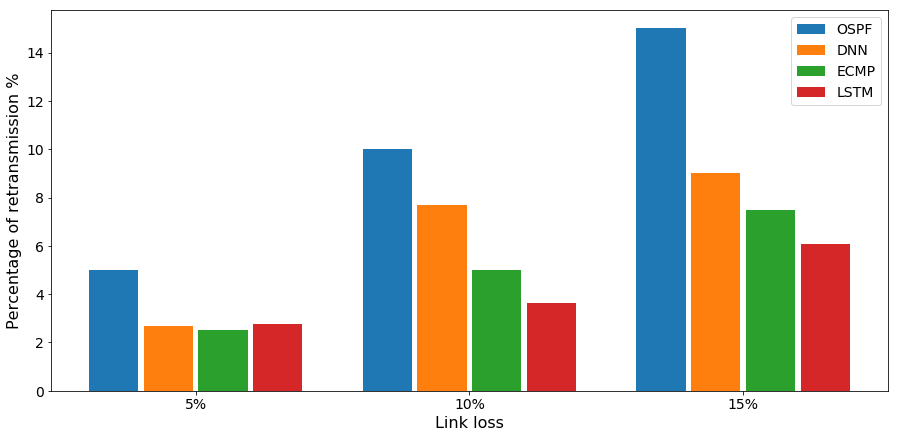

In [7]:
idx = np.arange(3)
# retransmission rates
ospf_ret = [5, 10, 15]
ecmp = [2.5, 5, 7.5]

lstm_ret_rate = retransmission_rate(lstm_cnt)
dnn_ret_rate = retransmission_rate(dnn_cnt)

#sns.set_style('ticks')
plt.figure(figsize=(15,7))
#plt.title('Retransmission comparison', fontsize=20)
plt.xlabel('Link loss', fontsize=16)
plt.ylabel('Percentage of retransmission %', fontsize=16)
plt.bar(idx-0.3, ospf_ret, width=0.18, label='OSPF')
plt.bar(idx-0.1, dnn_ret_rate, width=0.18,label = 'DNN')
plt.bar(idx+0.1, ecmp, width=0.18,label = 'ECMP')
plt.bar(idx + 0.3, lstm_ret_rate, width=0.18, label='LSTM')
plt.xticks(idx,['5%', '10%', '15%'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(False)
#sns.despine()
plt.savefig('prediction_full_cmp_bar.eps', transparent=True, format='eps', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
x = np.linspace(-3,3)
y = np.tanh(x)


In [ ]:
plt.figure(figsize=(12,7))
plt.axhline(0, color='black',linewidth=1)
plt.axhline(1, color='black', linewidth=0.8, ls='dotted')
plt.axhline(-1, color='black',linewidth=0.8, ls='dotted')
plt.axvline(0, color='black', linewidth=1)
sns.despine(left=True, bottom=True)
plt.title('Hyperbolic tangent\n', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(x,y)
plt.savefig('/home/alegaballo/Dropbox/tesi-Alessandro/presentation/img/tanh.eps', transparent=True, format='eps', dpi=500,bbox_inches='tight')
plt.show()